# MET 3601 Undergraduate Final Exam 2025

**There are 15 multiple-choice questions worth 2 points each on Canvas. Please make sure to take that portion of the exam as well during this time slot. Same policy applies (open notebook, open book).**

There are 6 coding problems in this notebook for a total of <span style="color:red">(70 pts)</span>.

- A reminder that you are on the honor code. This includes both **plagiarism** and **cheating on exams**! You may **NOT** use an AI engine on this exam! If you are caught doing this during the exam, it is an automatic zero!

- The exam is open book, open (Jupyter) notebook. **It is NOT open web - no browsing allowed!**

- You must turn in a completed notebook, renamed as

        `MET3601_Final_lastname.ipynb` in both JupyterHub and Canvas

  <br>

- You may use a "study-guide" (in the form of a Jupyter notebook) on jetstream.  

- One browser window is allowed for cloud access (Jetstream) and a second one for Canvas only. Once the Canvas portion is complete, you must close that window.

- DO NOT delete the embedded comments/point values! If you do, you will not receive credit for that part of the problem. **PLACE THE RELEVANT CODE AFTER EACH COMMENT!**

- This exam is due at the end of the exam period, 3:00 p.m. on Friday December 12, 2025.

**No late exams will be accepted - upload your exam to Canvas by 3:15 p.m.!**

In [ ]:
#DRL Please execute this cell! +1 pt extra credit

full_name = input("Please enter your full name: ")
print(f'"{full_name}" acknowledges that no AI was used during this exam.')


---
### Q1. Quick Map Warm-up!   <span style="color:red">(5 pts)</span> 
(see xarray notebooks)

Plot a map of the world. The figure should include the following items:

- PlateCarree projection
- coastlines
- latitude and longitude (labels and grid lines)

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#Add your code here (this is a blank map - no data should be harmed in the making of this figure!) 



---
### Q2. Precipitable Water Vapor: Hurricane Milton <span style="color:red">(20 pts)</span> 
(see xarray notebooks)

Plot a global map of precipitable water vapor using the following information:

- URL: `http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface/pr_wtr.eatm.2024.nc`
- Time: 2024-10-09 12:00 UTC

The figure should include:

- PlateCarree projection
- coastlines
- latitude and longitude (labels and grid lines)
- colorbar
- title

Do **NOT** hardwire your title. Use the datetime string and modulus (%) to f-string format it! It should look something like
<div>
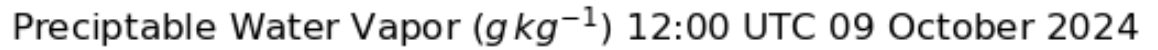
</div>

**FYI:** The precipitable water vapor \( PWV \) is given by:

$$
PWV = \frac{1}{g} \int_{p_{\text{sfc}}}^{p_{\text{top}}} q(p) \, dp
$$

Where:
 
- *PWV*  = precipitable water vapor ($kgm^{-2}$)
-  *g*   = acceleration due to gravity _9.81_ ($ms^{-2}$)
- *q(p)* = specific humidity as a function of pressure ($kgkg^{-1}$)
- $p_{sfc}$, $p_{top}$ = pressure at surface and top of atmosphere (Pa)

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime


#Import data using THREDDS URL (5 pts) 


#Set datetime (2.5 pts)


#Open and 'pop' the data (2.5 pts)



In [ ]:
#Set up graphics here (10 pts)


---
### Q3. Temperature Tantrum <span style="color:red">(5 pts)</span> 
(see metpy units notebook)

Using Metpy units and a current temperature of `20 °C`, perform the *units-based* calculation that yields a forecast high temperature of `25°C`.

In [ ]:
from metpy.units import units

#Define current temperature 


#Perform units-based calculation


#Print result (do not add units at this step - your answer should have units by default!)


---
### Q4. All is well that is LCL <span style="color:red">(10 pts)</span> 
(see metpy calculations notebook)

Assume a **surface** parcel with `T = 26 °C`, `Td = 18 °C`, and `p = 987 hPa`. Compute the **LCL pressure and LCL temperature** using MetPy. Print both with units.

*Deliverables*: Printed LCL pressure and LCL temperature.

In [ ]:
from metpy.units import units
import metpy.calc as mpcalc

#Define the variables (with units!)


#Calculate the LCL pressure and temperature


#Print out your results




---
### Q5. It ain't normal if it's skewed! <span style="color:red">(10 pts)</span>  
(see skewT plotting notebook)

The goal is to create a SkewT with `rotation=45`. To accomplish this task:

**1)** Run (no edits needed!) the code in the cell below to generate a faux (adiabatic) temperature profile that was obtained by solving Poisson's equation for temperature, i.e.

$
\theta = T \left( \frac{p_0}{p} \right)^{\frac{R_d}{c_p}}
$

In [ ]:
import numpy as np
#DRL Run this code first to generate a faux 🤓 temperature profile!

#DRL Initialize temperature list and pressure array
tlist = []
p     = np.array(np.arange(1000,300,-100))  # mb (hPa)

#DRL Calculate an adiabatic ascent profile where T(p=1000 hPa) = 30°C
#Conversion and constants
p0 = 1000.0          # mb
T0_C = 30.0          # temperature at 1000 hPa
T0_K = T0_C + 273.15 #Convert to K
kappa = 0.286        # Rd/cp for dry air

# Dry-adiabatic temperature profile (from Poisson's Eqn.)
T_K = T0_K * (p / p0) ** kappa
T_C = T_K - 273.15

# Use this output in the cell below!
for pi, Ti in zip(p, T_C):
    tlist.append(Ti)

**2)** *Transfer* the profile (**tlist**) to the next cell and use Metpy to plot **temperature** versus pressure from 1000-to-400 hPa (in 100 hPa) increments.

Make sure you include the following:

- dry adiabats
- moist adiabats
- mixing ratios

On your skewT, you should 
- set y-limits 1000–400 hPa 
- set x-limits −20 to 30 °C

Plot the skewT

In [ ]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT
import numpy as np
from metpy.units import units

# Set up the temperature array (the pressure array has already been defined above!)


#Add skewT graphic here +10 pts



---
### Q6. SOI <span style="color:red">(20 pts)</span> 
(see pandas and matplotlib_line_plots notebooks)

Use the cleaned up Southern Oscillation Index dataframe below to answer the following questions. The file is located in the cloud (in the Final_Exam folder). 

**i)** Read the file and _set the index_ to the 'YEAR'

In [ ]:
import pandas as pd
path = '  '
file = 'soi_dataset_final.csv'

#Read the .csv (+1 pt)

#Pop the top 10 lines! (+ 1 pt)


**ii)** Use the appropriate method to pop the dataframe variable types and index.

In [ ]:
#Data type and index (+1 pt)




**iii)** Subset the years Jan 1, 1991 to Dec 31, 2020  (**30-yr climatology**).

In [ ]:
#Subset Here (+1 pt)


**iv)** For each month, calculate the average SOI over the 30-year period obtained from part iii).

In [ ]:
#Monthly avg (+5 pts)


**v)** Extract the El Niño year 1997 from the data frame

In [ ]:
#1997 SOI (+1 pt)


**vi)** Plot both the 1997 and 30-yr SOI climatology (y-axis) versus month (Jan-Dec, x-axis - see my figure below). Include

- title
- legend
- grid lines

**Hint:** You will likely need to use the .index and .values methods

In [ ]:
import matplotlib.pyplot as plt

#Add Graphics (+10 pts)



DRLs Figure
<div>
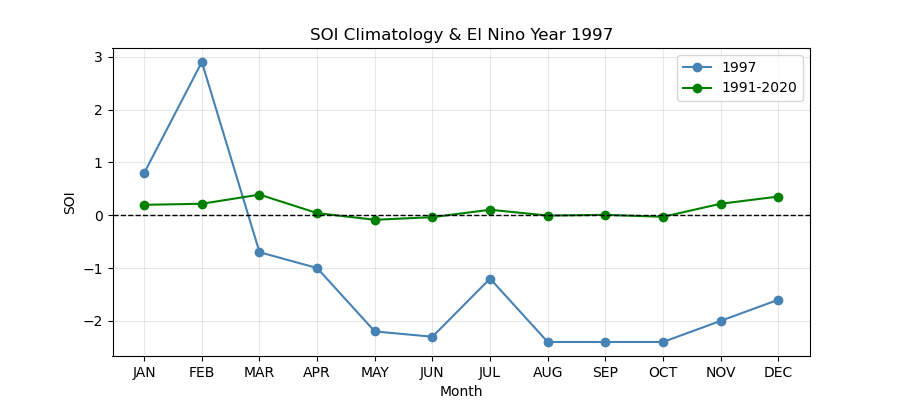
</div>